Номер группы, ФИО: 402 Билецкий АО

In [44]:
import numpy as np
import pandas as p
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from plot_region import *

Сгенерировать данные в виде полумесяцев. Количество образцов 300, шум 0.3, random_state=0
Разбить данные в соотношении 7/3, random_state=12

In [45]:
X,y = make_moons(n_samples=300, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Найти оптимальное значение гиперпараметра gamma (поиск в пределах 0.1-5, с шагом 0.1), которое показывает максимальную точность на кросс-валидации в 5 блоков для алгоритма SVC с ядром RBF. 
* Вывести значение найденного гиперпараметра. 
* Отобразить таблицу по результатам подбора гиперпараметров - метод GetDfFromCvResults (включен в файл plot_region, принимает параметр grid_search).
* Вывести точность на отложенных данных
* Отобразить границу разделяющей кривой (PlotResultRegion(Обученный классификатор, X, y, h=0.02))

In [46]:

pipe = Pipeline(steps=[             ('scaler', MinMaxScaler()),
                                    ('estimator', SVC(kernel='rbf'))])

pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('estimator', SVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'estimator': SVC(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False}

In [47]:
c = np.arange(0.1,8,0.1)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
param_grid = {'estimator__gamma': c}
grid_search = GridSearchCV(pipe, param_grid,cv=kfold)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'estimator__gamma': 7.9}

In [48]:
GetDfFromCvResults(grid_search)

/Users/arseniybileckiy/PycharmProjects/Database3/ML_4c/HW_5/plot_region.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  .join(p.io.json.json_normalize(grid_search.cv_results_["params"]).add_prefix("param_")))


,mean_test_score,mean_fit_time,param_estimator__gamma
0,0.828571,0.009252,0.1
1,0.823810,0.002234,0.2
2,0.819048,0.001745,0.3
3,0.814286,0.001838,0.4
4,0.814286,0.002064,0.5
...,...,...,...
74,0.852381,0.001463,7.5
75,0.857143,0.001538,7.6
76,0.861905,0.001801,7.7
77,0.861905,0.001571,7.8


In [49]:
y_pred=grid_search.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred).round(3)

0.889

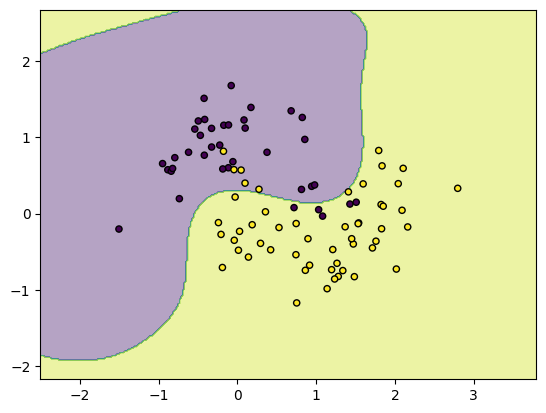

In [51]:
PlotResultRegion(grid_search, X_test, y_test, h=0.02)

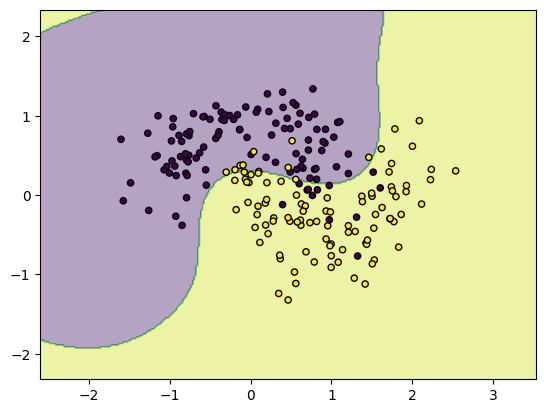

In [53]:
PlotResultRegion(grid_search, X_train, y_train, h=0.02)